In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv("../data/processed/cleaned_loan_data_capped.csv")
print(df.shape)
df.head()


(17719, 22)


,ID number,Personnel Number,Basic Salary,Payment,AFFORDABILITY,LoanId,Regions,Gender,Age,Tenure,...,DisbursementAmount,DisbursementDate,LastPaymentDate,Instalment,PrincipalBalance,LoanStatus,InterestRate,LoanPurpose,RetirementDate,IsNPL
0,ID_1,50403,7756.305,7910.80,3940.00000,LN20242200000143311,Venus,Male,34,6.0,...,5000.0000,2025-06-10,2025-06-30,1713.56,7704.47,Active,33.0,Home improvement,2038-07-02,Not NPL
1,ID_2,50422,7756.305,3657.80,0.00000,LN20240240000119983,Gilmore,Female,46,60.0,...,40988.2475,2024-01-29,2025-06-30,2574.10,44656.34,Active,38.0,Education,2034-10-26,Not NPL
2,ID_3,5,7756.305,9580.26,6456.11575,LN20242270000144475,Venus,Female,41,60.0,...,9734.5100,2024-08-14,2025-05-31,1864.91,266.13,Settled,38.0,Debt consolidation,2059-08-24,Not NPL
3,ID_5,27,7756.305,9580.26,6456.11575,LN20232570000106355,Venus,Female,36,24.0,...,15000.5400,2023-09-14,2025-06-26,2113.57,3219.25,Active,35.0,Personal Use,2030-08-28,Not NPL
4,ID_6,29,7756.305,9580.26,2294.06200,LN20243620000161297,Woodlawn,Male,32,60.0,...,22734.1600,2024-12-27,2025-06-27,3505.83,67360.79,Active,38.0,Building/Purchase home,2042-07-17,Not NPL


In [3]:
df.info()  # columns, data types, missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17719 entries, 0 to 17718
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID number           17719 non-null  object 
 1   Personnel Number    17719 non-null  int64  
 2   Basic Salary        17718 non-null  float64
 3   Payment             17719 non-null  float64
 4   AFFORDABILITY       17718 non-null  float64
 5   LoanId              17719 non-null  object 
 6   Regions             17719 non-null  object 
 7   Gender              17719 non-null  object 
 8   Age                 17719 non-null  int64  
 9   Tenure              17719 non-null  float64
 10  LoanDate            17719 non-null  object 
 11  LoanAmount          17719 non-null  float64
 12  DisbursementAmount  17719 non-null  float64
 13  DisbursementDate    17719 non-null  object 
 14  LastPaymentDate     17521 non-null  object 
 15  Instalment          17719 non-null  float64
 16  Prin

In [4]:
df.describe(include="all").T  # mean, median, std, min, max, unique counts


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID number,17719,17719,ID_20875,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Personnel Number,17719.0,NaN,NaN,NaN,230407.285569,122276.375727,5.0,121912.0,242040.0,337581.0,438575.0
Basic Salary,17718.0,NaN,NaN,NaN,6504.516945,827.967233,5129.945,6114.83,6595.92,6771.42,7756.305
Payment,17719.0,NaN,NaN,NaN,4478.823803,1955.077968,1353.34,2910.46,3917.56,5578.38,9580.26
AFFORDABILITY,17718.0,NaN,NaN,NaN,1739.543527,1749.869182,-2419.44,318.3445,1114.457,2773.453,6456.11575
LoanId,17719,17719,LN20250280000165574,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Regions,17719,4,Woodlawn,4501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,17719,2,Male,8903,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,17719.0,NaN,NaN,NaN,41.655229,13.763058,18.0,30.0,42.0,53.0,65.0
Tenure,17719.0,NaN,NaN,NaN,43.697782,20.061581,1.0,24.0,60.0,60.0,114.0


In [5]:
df.isnull().sum()  # how many NaNs per column


ID number               0
Personnel Number        0
Basic Salary            1
Payment                 0
AFFORDABILITY           1
LoanId                  0
Regions                 0
Gender                  0
Age                     0
Tenure                  0
LoanDate                0
LoanAmount              0
DisbursementAmount      0
DisbursementDate        0
LastPaymentDate       198
Instalment              0
PrincipalBalance        0
LoanStatus              0
InterestRate            0
LoanPurpose             0
RetirementDate          0
IsNPL                   0
dtype: int64

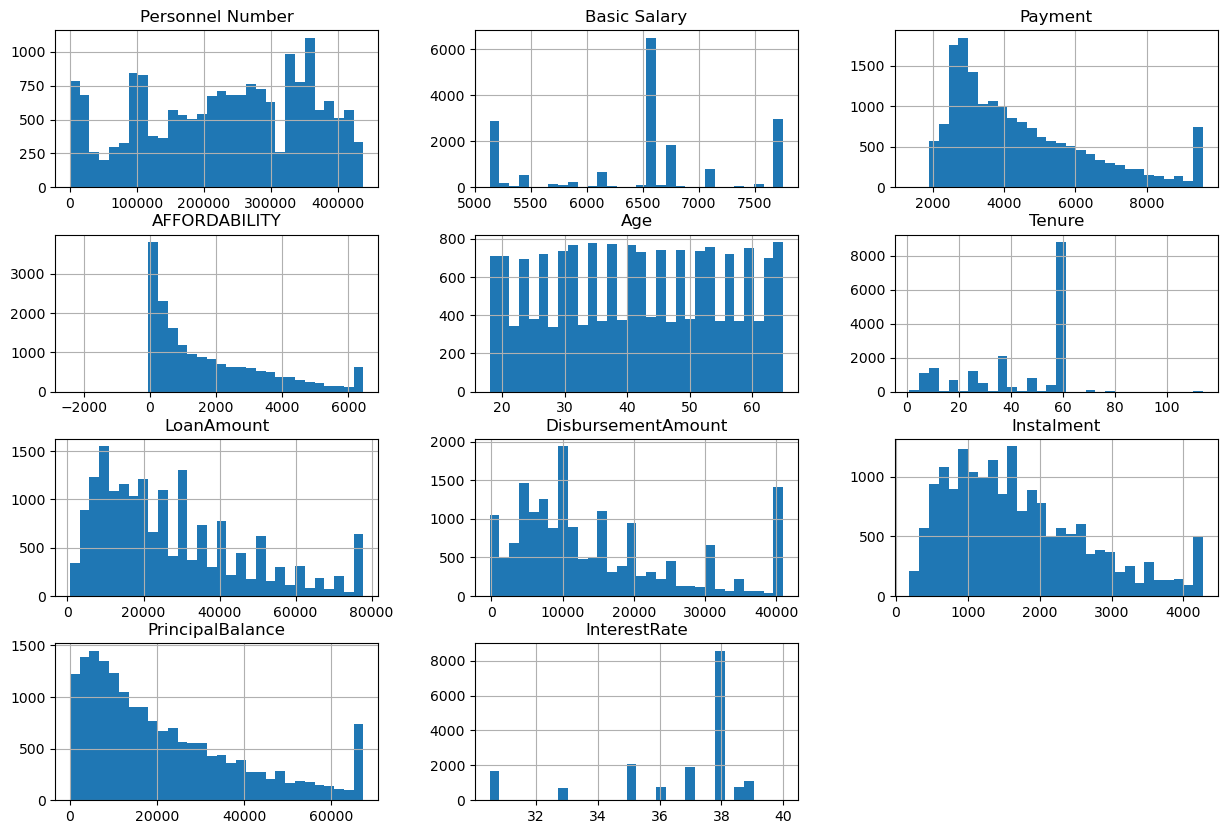

In [6]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].hist(bins=30, figsize=(15,10))
plt.show()


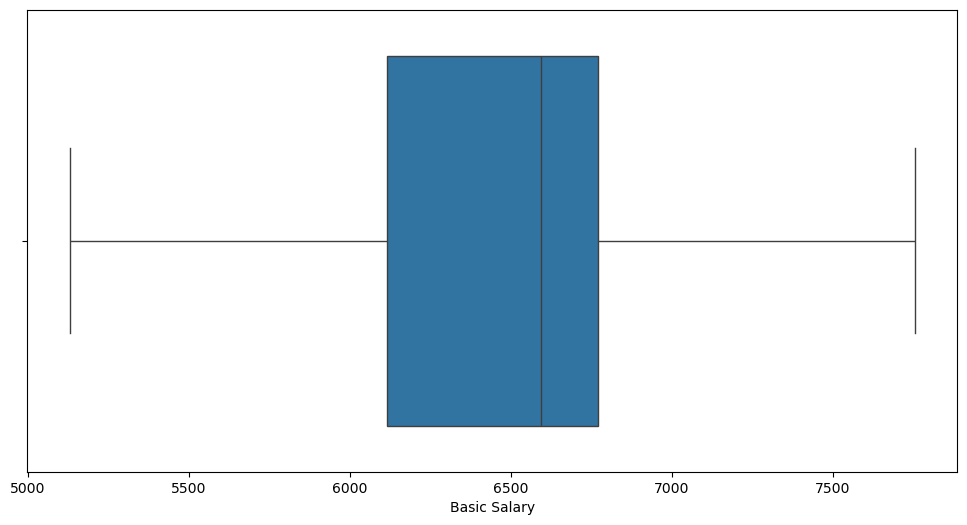

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Basic Salary'])
plt.show()


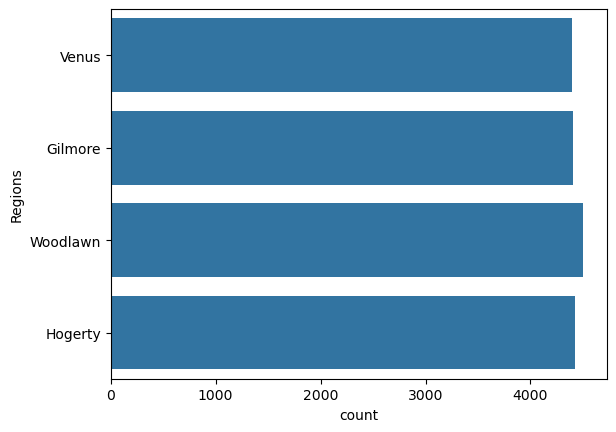

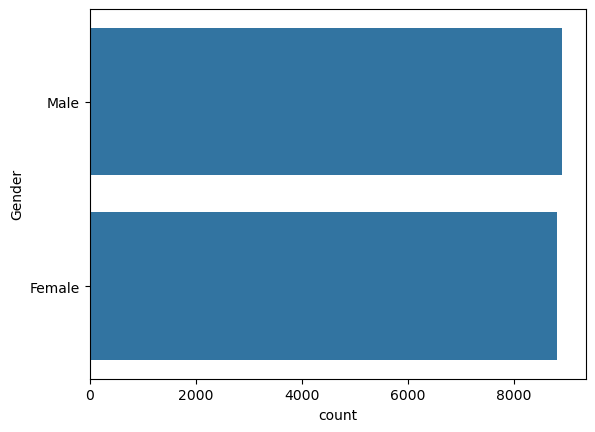

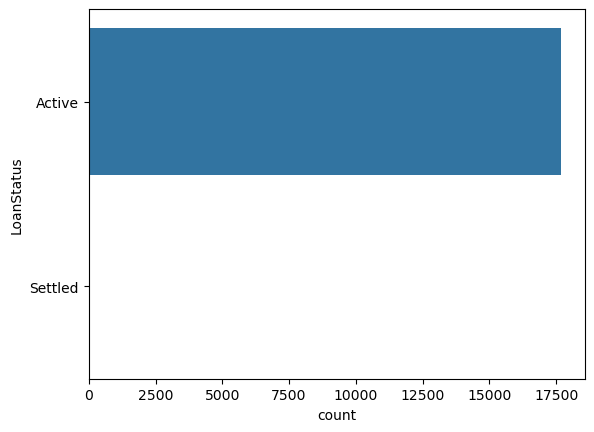

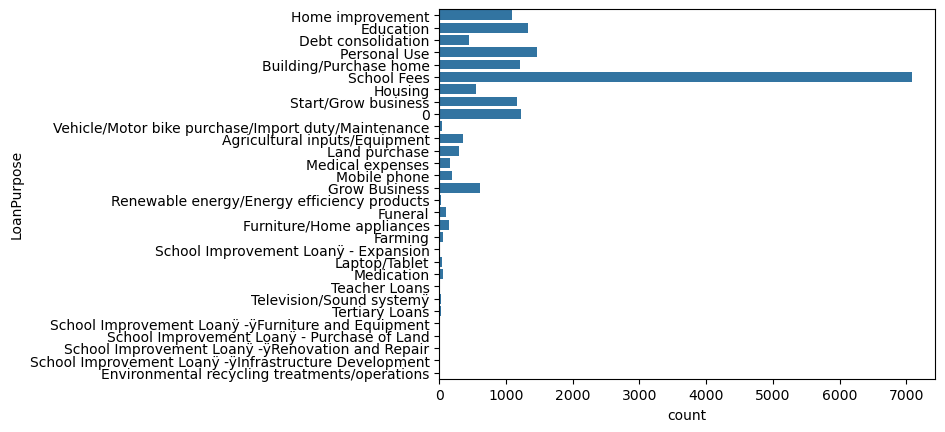

In [8]:
categorical_cols = ['Regions', 'Gender', 'LoanStatus', 'LoanPurpose']
for col in categorical_cols:
    sns.countplot(y=col, data=df)
    plt.show()


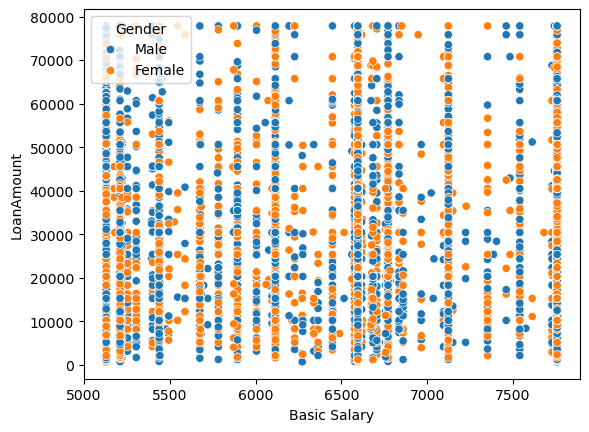

In [11]:
sns.scatterplot(x='Basic Salary', y='LoanAmount', hue='Gender', data=df)
plt.show()


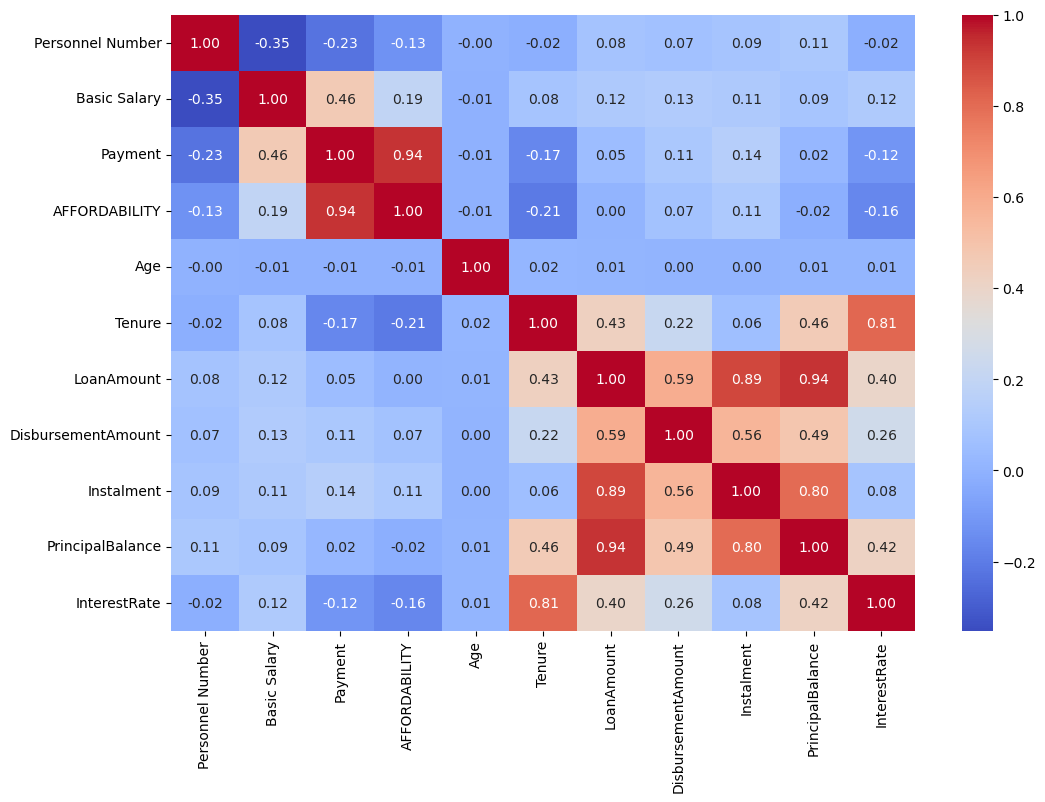

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


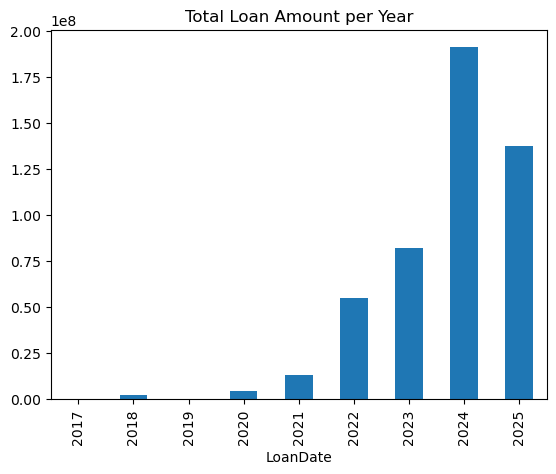

In [14]:
# Time-based Analysis

df['LoanDate'] = pd.to_datetime(df['LoanDate'])
df.groupby(df['LoanDate'].dt.year)['LoanAmount'].sum().plot(kind='bar')
plt.title("Total Loan Amount per Year")
plt.show()
